# DCT Academy's Code Platform Analysis - Intersting Insights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import requests
import json
import os

In [2]:
API_KEY = os.environ['DCT_CODE_PLATFORM_API_KEY']

In [3]:
# Dictionary of all the tables and their columns
table_columns = {}

# Dictionary of all dataframes mapped with table names
df_all = {}

# List of all dataframes of all tables
df_list = []

request_tables = ['submissions', 'assignments', 'tags', 'taggings', 'users']

for table in request_tables:
    url = 'http://code.dctacademy.com/api/v1/ml/data/' + table + '?key=' + API_KEY
    response = requests.get(url)
#     print(response.status_code, response.reason)
    df_all[table] = pd.read_json(response.content)

In [4]:
df_all.keys()

dict_keys(['submissions', 'assignments', 'tags', 'taggings', 'users'])

In [5]:
df_all['submissions']['time_hr'] = df_all['submissions']['time_in_seconds'] / 60 / 60 

In [6]:
user_submissions = df_all['submissions'] \
    .merge(df_all['assignments'], left_on='assignment_id', right_on='id', suffixes=('_submissions', '_assignments')) \
    .merge(df_all['taggings'], left_on='id_assignments', right_on='taggable_id', suffixes=('_sub_ass', '_taggings')) \
    .merge(df_all['tags'], left_on='tag_id', right_on='id', suffixes=('_sub_ass_tag', '_tags'))

In [7]:
df_all['users'] = df_all['users'].reset_index()

In [8]:
user_submissions = user_submissions.merge(df_all['users'], left_on='user_id_submissions', right_on='id')

In [9]:
user_submissions.columns

Index(['id_submissions', 'statement', 'output', 'user_id_submissions',
       'language', 'assignment_id', 'practice_id', 'created_at_submissions',
       'updated_at_submissions', 'is_checked', 'time_in_seconds', 'pass',
       'fail', 'total', 'points_submissions', 'code_submissions', 'video_url',
       'time_hr', 'id_assignments', 'title', 'body', 'url',
       'created_at_assignments', 'updated_at_assignments',
       'user_id_assignments', 'source', 'is_allowed', 'code_assignments',
       'approved', 'points_assignments', 'minutes', 'function_name',
       'input_size', 'is_front_end', 'display_helper', 'id_sub_ass_tag',
       'tag_id', 'taggable_type', 'taggable_id', 'tagger_type', 'tagger_id',
       'context', 'created_at_x', 'id_tags', 'name', 'taggings_count', 'index',
       'id', 'username', 'email', 'created_at_y', 'updated_at', 'student_id',
       'allowed_to_log_in'],
      dtype='object')

# Distribution of Assignments

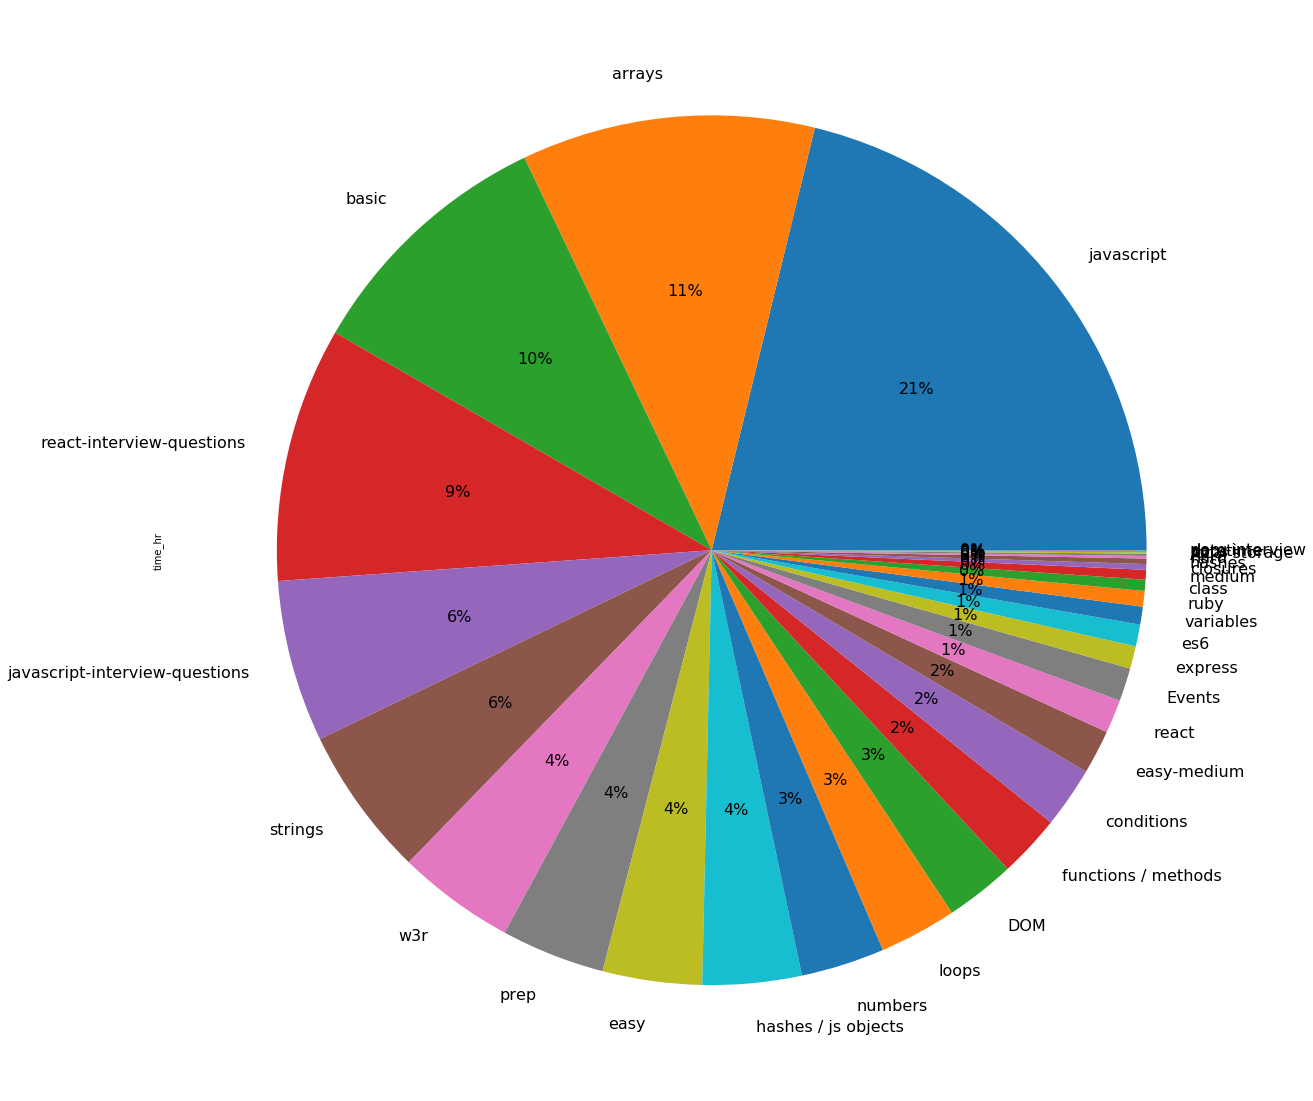

In [10]:
user_submissions.groupby(['name']).count()['time_hr'].sort_values(ascending=False).abs().plot(kind='pie', figsize=(20, 20), autopct='%1.0f%%', fontsize=16)
plt.show()

# Most Popular Tags

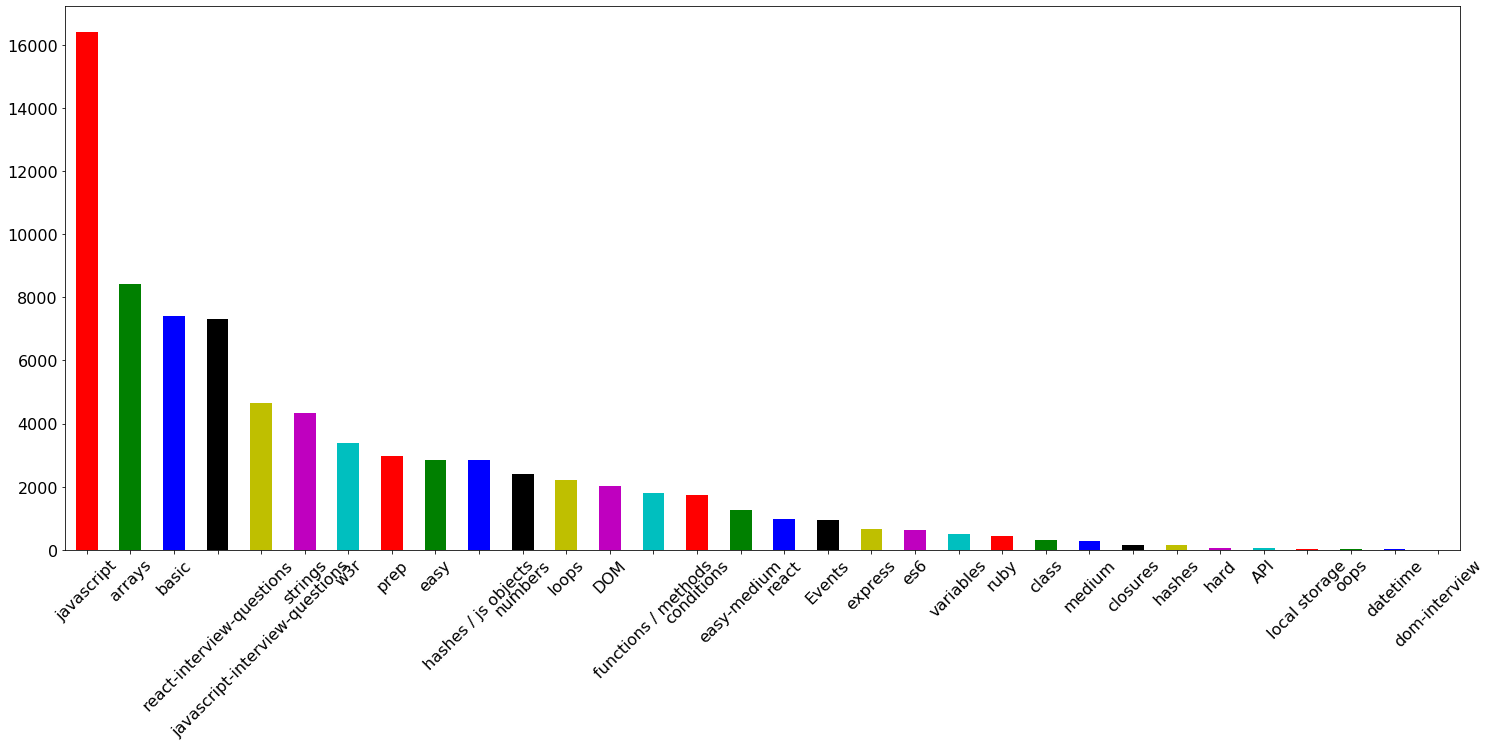

In [11]:
user_submissions['name'] = user_submissions['name'].str.strip().replace('/',',')
user_submissions['name'].value_counts().plot(kind='bar', figsize=(25, 10), color = list('rgbkymc'), rot=45, fontsize=16)
plt.show() 

* **Javascript**, **Arrays** and **Basics** are the most popular topics
* **React Interview Questions** and **JavaScript Interview Questions** follow

# Top 25 Submissions

## Top 25 Submissions - Number of Assignments Solved

/home/sudhanva/anaconda3/envs/tf21/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sudhanva/anaconda3/envs/tf21/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


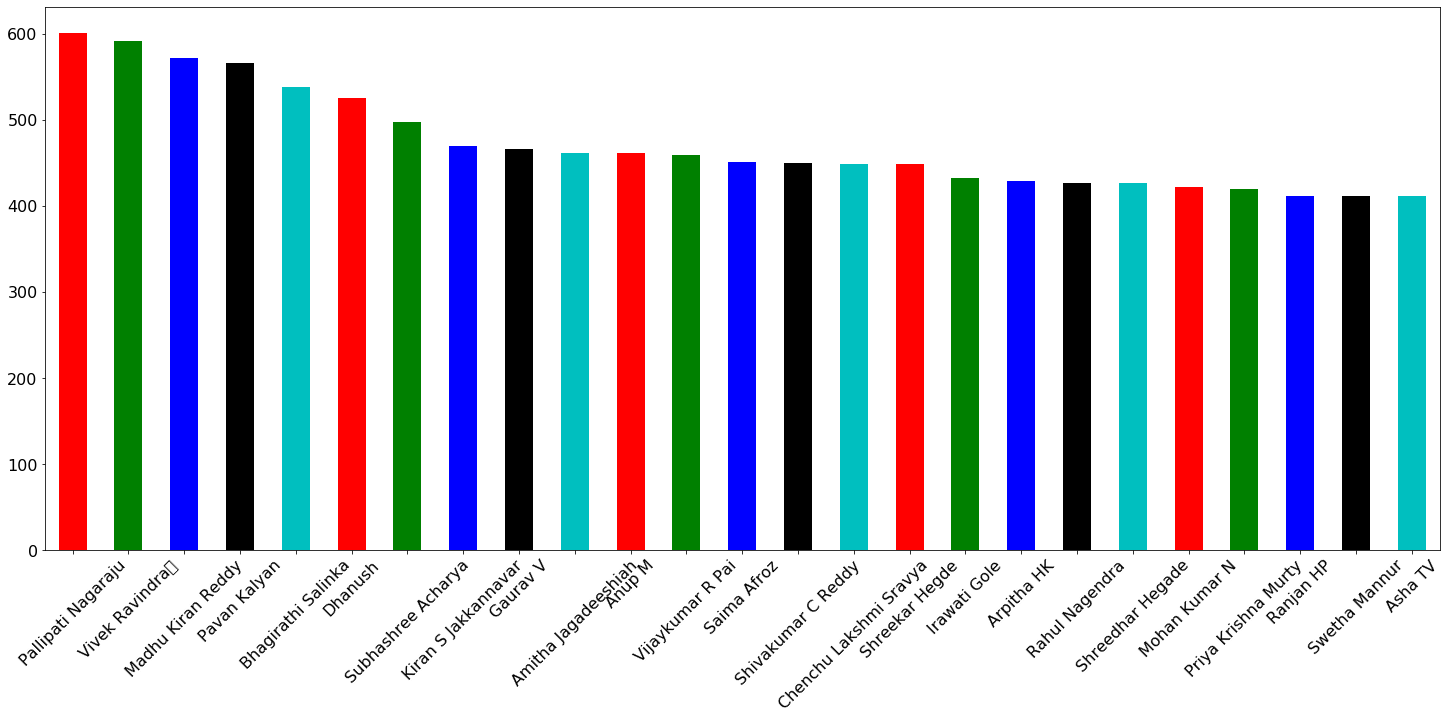

In [12]:
user_submissions['username'].value_counts()[:25].plot(kind='bar', figsize=(25, 10), color = list('rgbkc'), rot=45, fontsize=16)
plt.show()

## Top 25 Submissions - Total Time Spent on the Code Platform

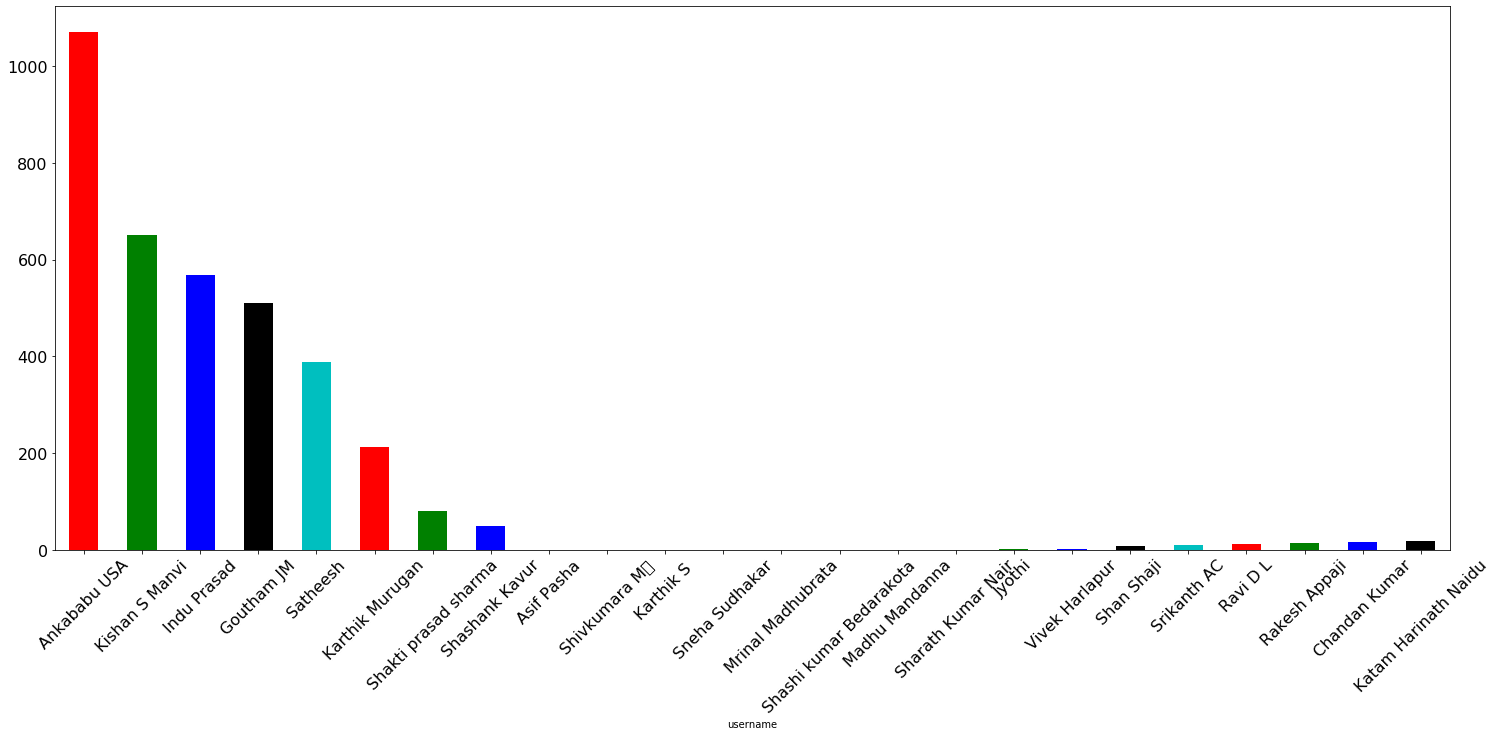

In [13]:
user_submissions.groupby(['username']).sum()['time_hr'].sort_values().abs()[:25][-24:].plot(kind='bar', figsize=(25, 10), color = list('rgbkc'), rot=45, fontsize=16)
plt.show()

## Top 25 Submissions - Total Points Earned on the Code Platform

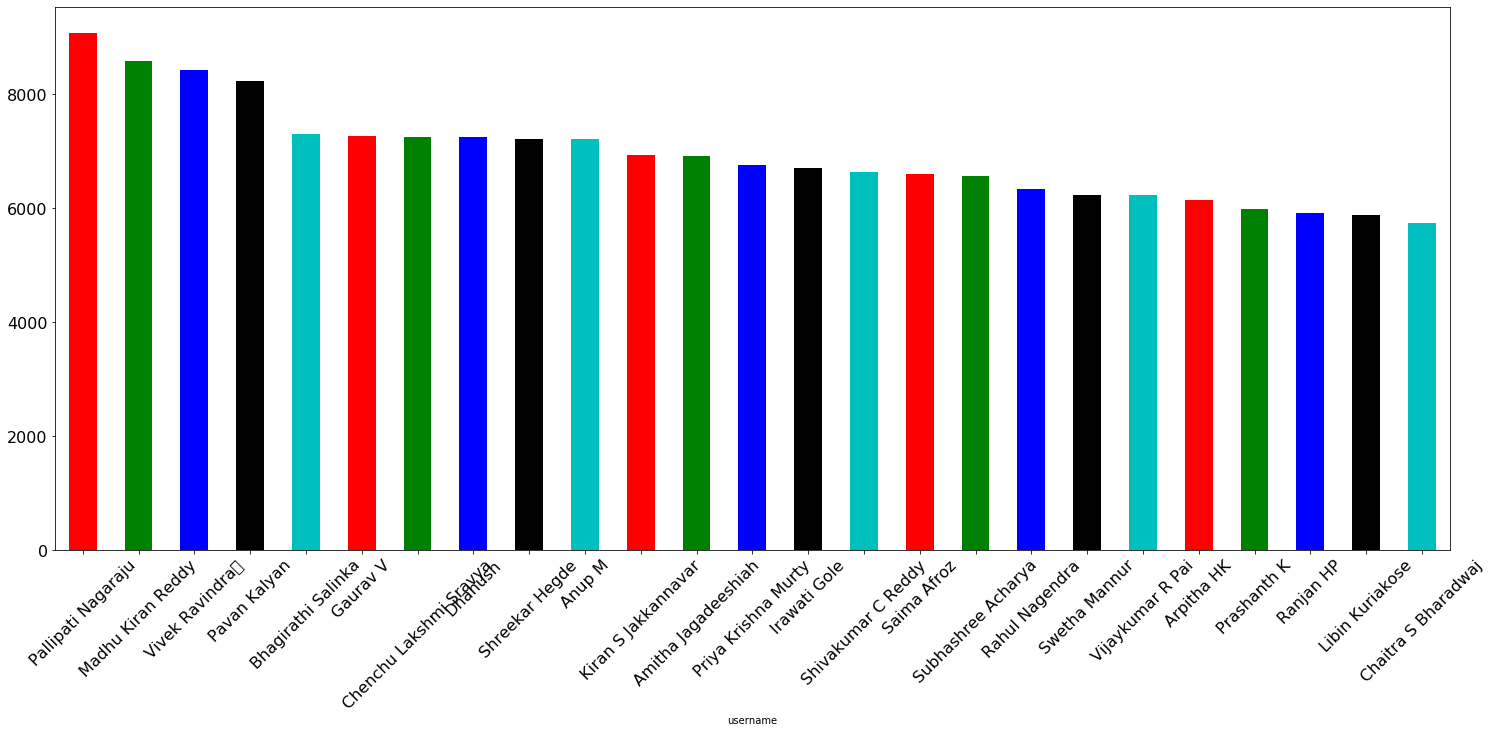

In [14]:
user_submissions.groupby(['username']).sum()['points_assignments'].sort_values(ascending=False).abs()[:25].plot(kind='bar', figsize=(25, 10), color = list('rgbkc'),  rot=45, fontsize=16)
plt.show()

# Submission Attempts - Pass

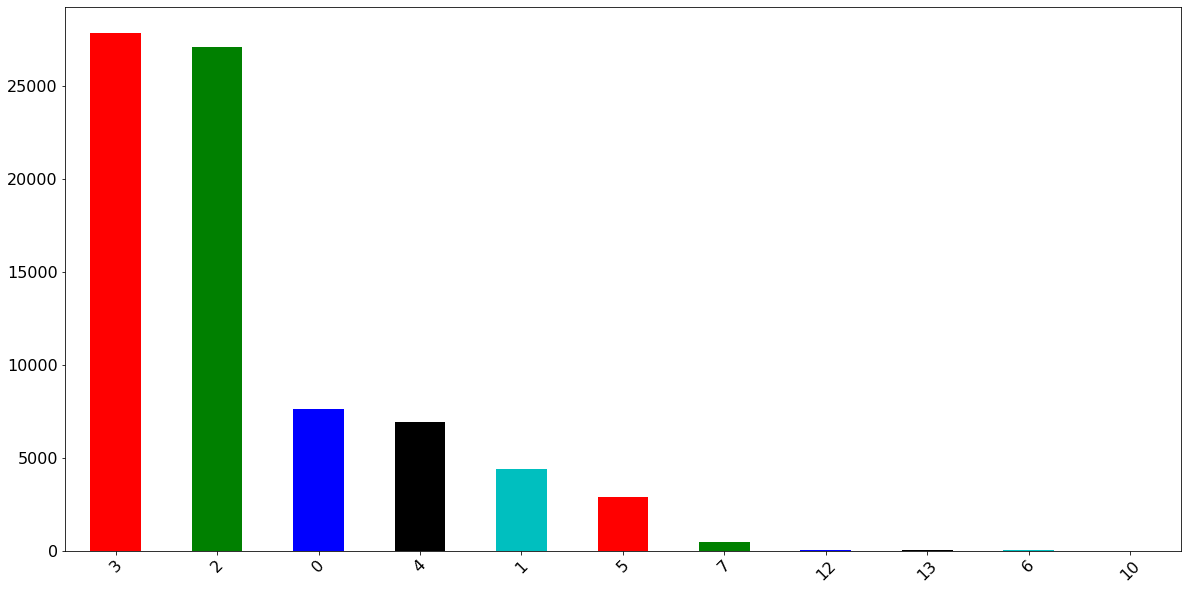

In [15]:
user_submissions['pass'].value_counts().plot(kind='bar', figsize=(20, 10), color = list('rgbkc'), rot=45, fontsize=16)
plt.show()

* **3rd and 2nd** are the most popular attempts for passing test cases

# Submission Attempts - Fail

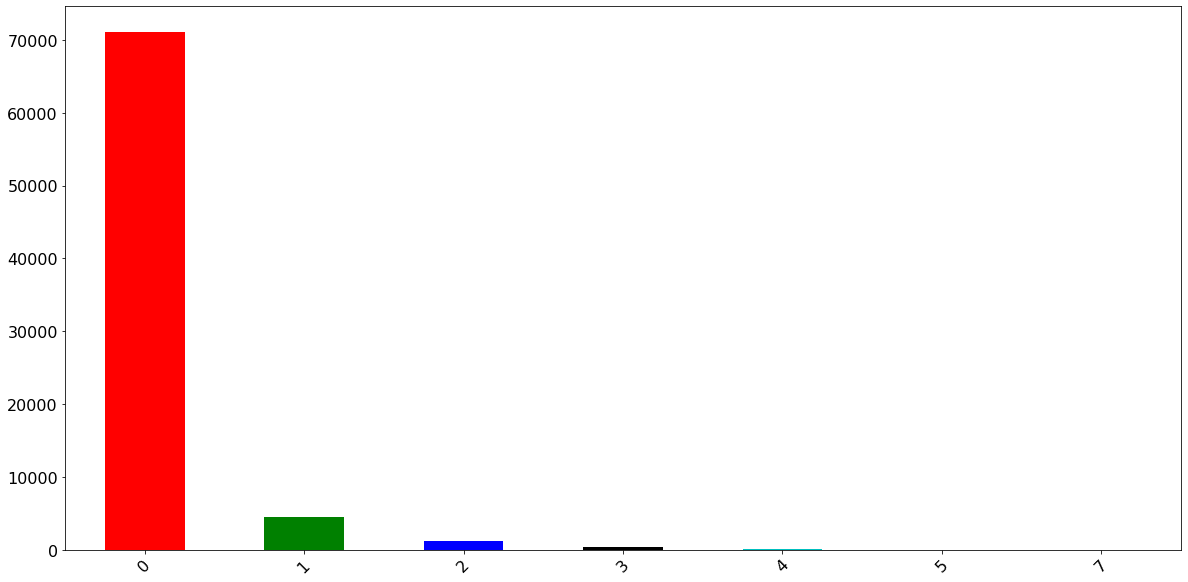

In [16]:
user_submissions['fail'].value_counts().plot(kind='bar', figsize=(20, 10), color = list('rgbkc'), rot=45, fontsize=16)
plt.show()

* **1st** is the most popular attempt for failing test cases

In [17]:
user_submissions['created_at_submissions'] = pd.to_datetime(user_submissions['created_at_submissions'].dt.date)

# Most Popular Month of Year

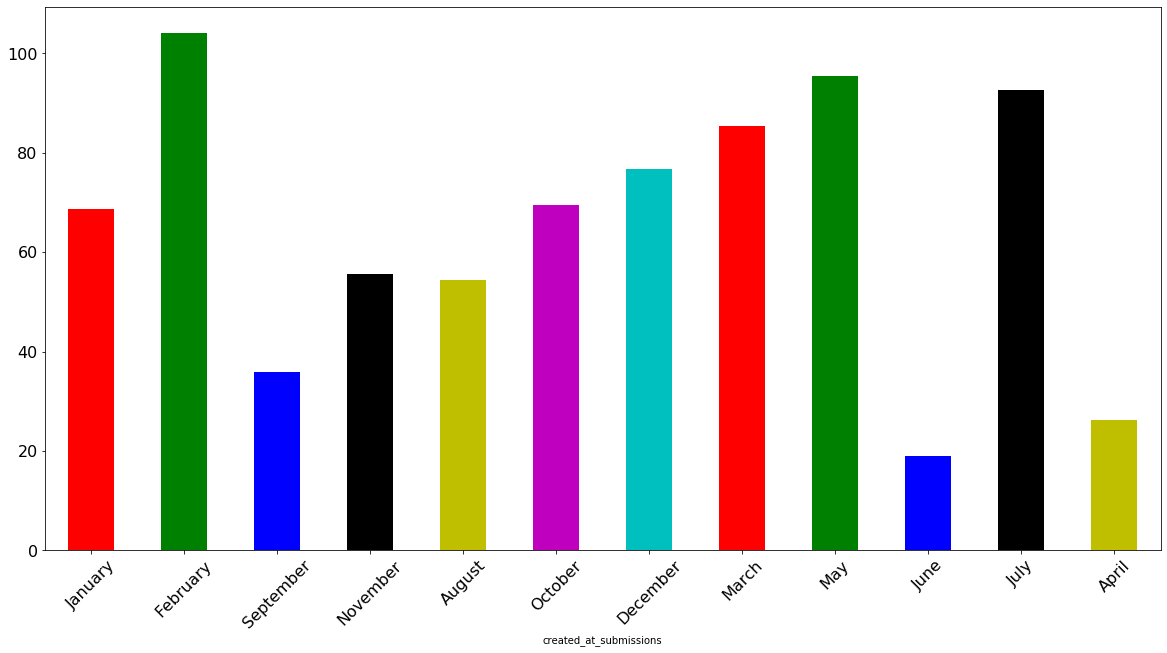

In [18]:
user_submissions.groupby([user_submissions['created_at_submissions'].dt.month_name()], sort=False).mean().eval('time_hr').plot(kind='bar', figsize=(20, 10), color = list('rgbkymc'),  rot=45, fontsize=16)
plt.show()

# Most Popular Day of the Week

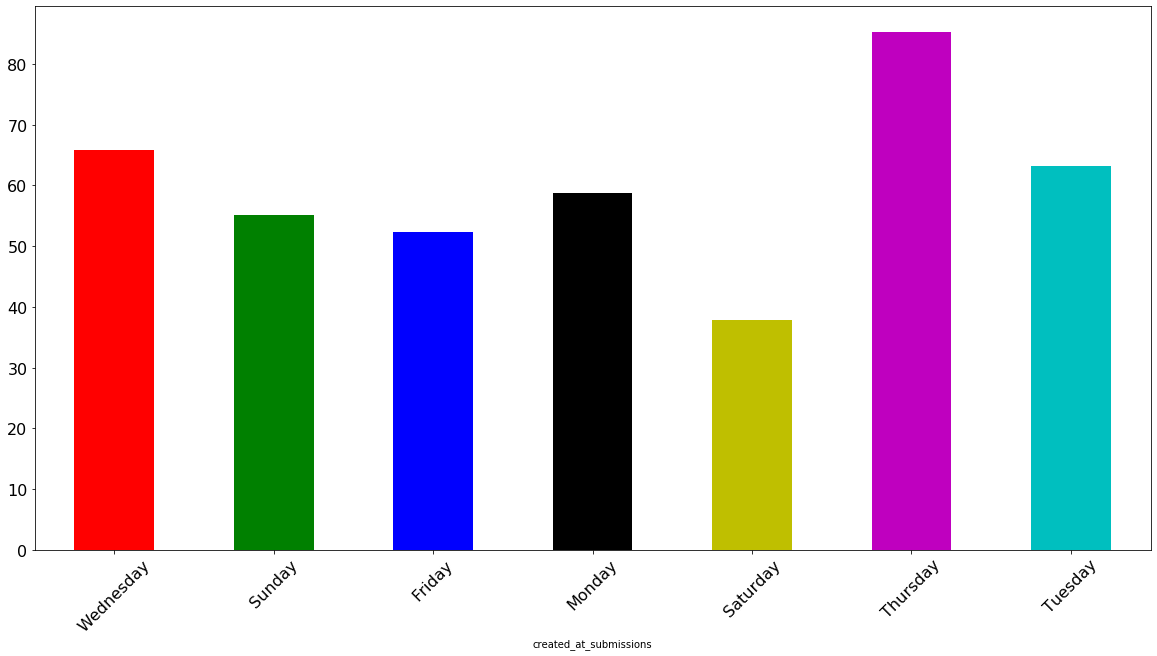

In [19]:
user_submissions.groupby([user_submissions['created_at_submissions'].dt.day_name()], sort=False).mean().eval('time_hr').plot(kind='bar', figsize=(20, 10), color = list('rgbkymc'),  rot=45, fontsize=16)
plt.show()

# Most Popular Hour of the Day

In [20]:
user_submissions['created_at_hr'] = user_submissions['created_at_x'].dt.hour

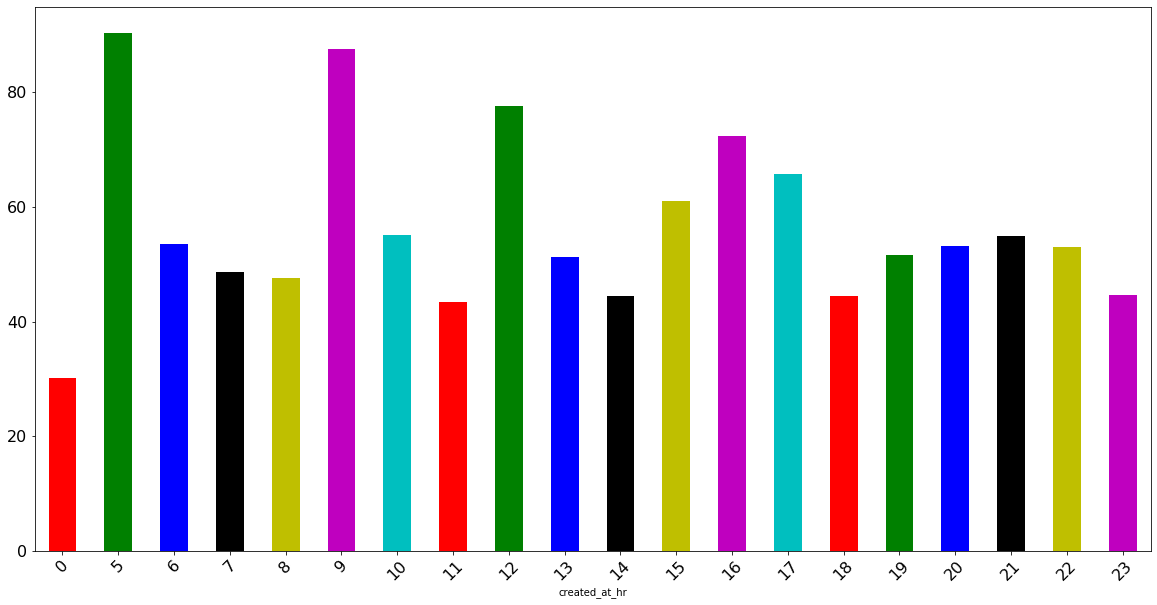

In [21]:
user_submissions.groupby([user_submissions['created_at_hr']]).mean().eval('time_hr').plot(kind='bar', figsize=(20, 10), color = list('rgbkymc'),  rot=45, fontsize=16)
plt.show()